In [1]:
from helpers import *

The data I have range from 2016-09-04 to 2018-10-17 (2 years, 1 months and 13 days)
I'm gonna get the first 1 year and 6 months to start with (2018-03-04) and I will increment from there.


In [4]:
base_date = datetime.strptime("2018-03-04 00:00:00", '%Y-%m-%d %H:%M:%S')
(final_df, undersample_df, df_half) = get_segmented_data(base_date)

end_date = datetime.strptime("2018-10-17 00:00:00", "%Y-%m-%d %H:%M:%S")  


In [5]:
df = final_df.drop(columns=["customer_unique_id", "last_order_date"], axis=1)
df_data = pd.DataFrame(final_df[["customer_unique_id"]])
(pca, kmeans, labels) = get_original_label_of_dataframe(df)
df_data['T0'] = labels


TypeError: get_original_label_of_dataframe() missing 1 required positional argument: 'kmeans'

In [4]:
df_data.head()

,customer_unique_id,T0
0,0000f46a3911fa3c0805444483337064,3
1,0000f6ccb0745a6a4b88665a16c9f078,2
2,0004aac84e0df4da2b147fca70cf8255,2
3,00053a61a98854899e70ed204dd4bafe,0
4,0005e1862207bf6ccc02e4228effd9a0,3


In [5]:

# t1_date = base_date + timedelta(weeks=1)
# df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, t1_date, "T1")
i = 1

while True:  
    t_date = base_date + timedelta(weeks=i)
    t_label = f"T{i}"
    
    df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, t_date, t_label) 
    i += 1
    if i > 4:
        break
    if t_date > end_date:  
        break

In [6]:
df_data.head(20)

,customer_unique_id,T0,T1,T2,T3,T4
0,0000f46a3911fa3c0805444483337064,3,3,3,3,3
1,0000f6ccb0745a6a4b88665a16c9f078,2,2,2,2,2
2,0004aac84e0df4da2b147fca70cf8255,2,2,2,2,2
3,00053a61a98854899e70ed204dd4bafe,0,0,0,0,0
4,0005e1862207bf6ccc02e4228effd9a0,3,3,3,3,3
5,0006fdc98a402fceb4eb0ee528f6a8d4,1,1,1,1,1
6,00082cbe03e478190aadbea78542e933,2,2,2,2,2
7,000a5ad9c4601d2bbdd9ed765d5213b3,1,1,1,1,1
8,000bfa1d2f1a41876493be685390d6d3,2,2,2,2,2
9,000c8bdb58a29e7115cfc257230fb21b,4,4,4,4,4


In [7]:
reference_column = 'T0'
ari_scores = {}  

# Loop through all columns except the reference column  
for column in df_data.drop(columns=["customer_unique_id"], axis=1).columns:  
    if column != reference_column:
        # Calculate ARI between reference column and current column  
        ari = adjusted_rand_score(df_data[reference_column], df_data[column])  

        # Store the ARI score in the dictionary  
        ari_scores[column] = ari  

# Print the dictionary of ARI scores  
print(ari_scores)

{'T1': 0.862395010630752, 'T2': 0.768601037261921, 'T3': 0.6735197500933423, 'T4': 0.6091371330442351}


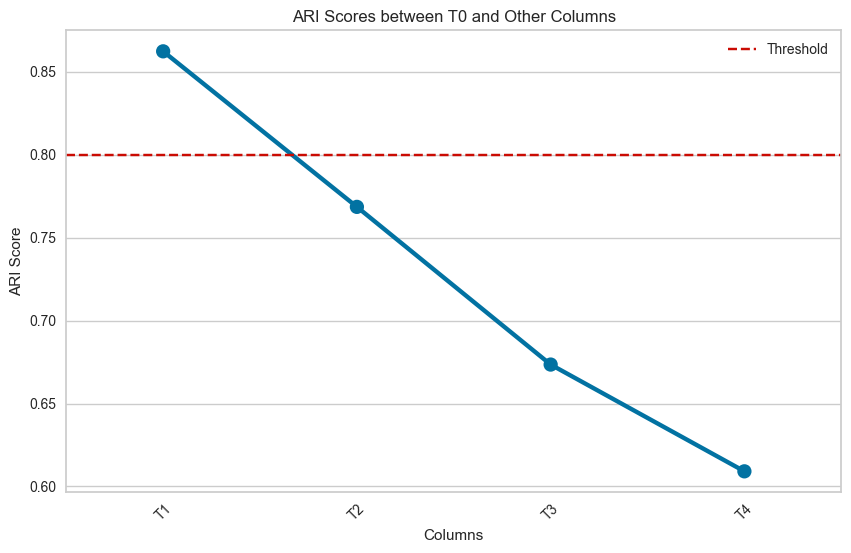

In [8]:
# Create a list of columns and corresponding ARI scores  
columns = list(ari_scores.keys())  
ari_values = list(ari_scores.values())  
  
# Create a line plot of the ARI scores  
plt.figure(figsize=(10,6))  
sns.pointplot(x=columns, y=ari_values)  
plt.xlabel('Columns')  
plt.ylabel('ARI Score')  
plt.title('ARI Scores between T0 and Other Columns')  
  
# Add a horizontal line at the threshold of 0.8  
plt.axhline(y=0.8, color='r', linestyle='--', label='Threshold')  
  
plt.xticks(rotation=45)  
plt.legend()
plt.show()

In [9]:
simulation_delay_in_days = 60
simulation_base_date = end_date - timedelta(days=simulation_delay_in_days)  

(final_df, undersample_df, df_half) = get_segmented_data(simulation_base_date)
df = final_df.drop(columns=["customer_unique_id", "last_order_date"], axis=1)
df_data = pd.DataFrame(final_df[["customer_unique_id"]])
(pca, kmeans, labels) = get_original_label_of_dataframe(df)
df_data['T0'] = labels

df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, end_date, "T1") 


In [10]:
df_data.head()

,customer_unique_id,T0,T1
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,4,4
4,0004aac84e0df4da2b147fca70cf8255,4,4


In [11]:
adjusted_rand_score(df_data["T0"], df_data["T1"])  


0.9195963591191152